# COMPSCI 690V - Homework5 - part1

### Team members: 
1. Chao-Ching Chiang
2. Bailin Wang
3. Jin Zhang

### Picked challenge:
- VAST 2014 Mini-Challenge 3

In [1]:
import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from utils import extract_hashtags, count_cooccurence
import warnings
warnings.filterwarnings('ignore')

### Read in MC3 dataset segment-1

In [2]:
fpath = './data/VAST-2014-MC3/1700-1830.csv'
df = pd.read_csv(fpath)

## Objective 1 - Rank the hashtags
Hashtags often reveal important information of the tweets. In order to evaluate the importance of each hashtag, we construct a undirected weighted graph based on the co-occurence of the hashtags in a tweet. Then, we rank these words using Google's PageRank algorithm.

### Extract the hashtags from the tweets and count the co-occurence

In [3]:
word2id, id2word = extract_hashtags(df['message'])
edge_dict = count_cooccurence(df['message'], word2id)

### Construct a undirected weighted graph 

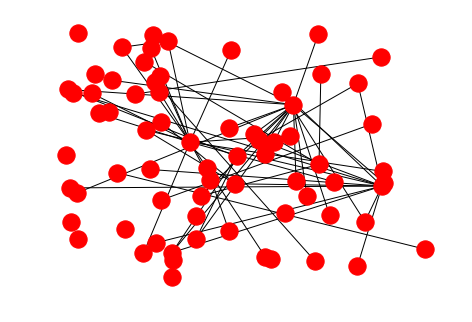

In [4]:
nodes = range(len(word2id.keys()))
edges = [(pair[0], pair[1], weight)for pair, weight in edge_dict.items()]

G=nx.Graph()
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges)

nx.draw_random(G)
plt.show()

### List the top 5 hashtags

In [5]:
pr = nx.pagerank(G, weight='weight')
top5indices = sorted(pr.items(), key=lambda x: x[1], reverse=True)[:5]
top5tags = [id2word[index] for index, rank in top5indices]
print('Top 5 hashtags:', top5tags)

Top 5 hashtags: ['pokrally', 'abila', 'pok', 'hi', 'kronosstar']


## Objective 2 - Detecting Events

The hidden events are mentioned either with hashtag or text. Hence, we try to rank out those potential keywords using Tf-IDF.

The segment 1 of provided datasets is also used for illustration.

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer, TfidfTransformer
vectorizer = TfidfVectorizer()
transformer = TfidfTransformer()

In [7]:
#message = " ".join(df['message'])
#print(type(df['message'][0]))
countVector = vectorizer.fit_transform(df['message'])
mat = transformer.fit_transform(countVector.toarray()).toarray()
analyze = vectorizer.build_analyzer()
print(mat[0])

[ 0.  0.  0. ...,  0.  0.  0.]


Set the threshold of the score, the following script will output some keywords such as "rally", "vacation".

In [8]:
threshold = 0.0003
keySet = set()
for i in range(len(df['message'])):
    tokens = analyze(df['message'][i])
    for j in range(len(tokens)):
        if mat[i][j] > threshold:
            keySet.add(tokens[j])

print(keySet)

{'vacation', '2001', '10', 'rally', 'the', 'in', 'gain', 'second', 'and', 'custom', 'attendance', 'to', 'at', 'kronos', 'getting', 'on', 'have', 'is', 'goldman', 'not', '100', 'has', 'co', '1s923k9', 'environmental', '1000', 'city', 'string', 'choconibbs'}
